In [2]:
# import the necessary packages
import tweepy
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

% matplotlib inline

from timeit import default_timer as timer

In [3]:
# set the option to view all columns within the notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# define the api keys
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token_key = 'HIDDEN'
access_token_secret = 'HIDDEN'

# initiate the api
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token_key, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [5]:
# download the tweet image predictions tsv file programmatically
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [6]:
# read in the archive csv file
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [7]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

2356

In [10]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [152]:
# create a dataframe from the resulting json item reading all lines
tweets_df = pd.read_json('tweet_json.txt', lines = True)

In [153]:
# rename the column 'id' to match the other dataframes
tweets_df = tweets_df.rename(columns = {'id': 'tweet_id'})

In [154]:
# created a dataframe for the image_predictions tsv file
images = pd.read_csv('image_predictions.tsv', sep = '\t')

In [155]:
# merged the 'archive' with the 'tweets_df' 
df = pd.merge(archive, tweets_df, on = 'tweet_id', how = 'outer')

In [156]:
# merged the previous result of the merge with 'images' dataframe 
df = pd.merge(df, images, on = 'tweet_id', how = 'outer')

In [157]:
# view the columns within the dataframe
df.columns

Index(['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x',
       'timestamp', 'source_x', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'contributors', 'coordinates',
       'created_at', 'display_text_range', 'entities', 'extended_entities',
       'favorite_count', 'favorited', 'full_text', 'geo', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id_y',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'retweet_count', 'retweeted', 'retweeted_status', 'source_y',
       'truncated', 'user', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2'

In [158]:
# programatically assess the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 59 columns):
tweet_id                         2356 non-null int64
in_reply_to_status_id_x          78 non-null float64
in_reply_to_user_id_x            78 non-null float64
timestamp                        2356 non-null object
source_x                         2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null float64
retweeted_status_user_id         181 non-null float64
retweeted_status_timestamp       181 non-null object
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                            23

In [159]:
# manually/visually assess the dataframe
df.sample(5)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id_str,in_reply_to_screen_name,in_reply_to_status_id_y,in_reply_to_status_id_str,in_reply_to_user_id_y,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source_y,truncated,user,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
142,864279568663928832,NaN,NaN,2017-05-16 00:41:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Meatball. He doing what's known in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/864279568...,12,10,Meatball,None,None,None,None,NaN,NaN,2017-05-16 00:41:21,"[0, 129]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 864279556340957184, 'id_str'...",13695.0,False,This is Meatball. He doing what's known in the...,NaN,8.642796e+17,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,2768.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/C_6JrWZVwAAHhCD.jpg,1.0,bull_mastiff,0.668613,True,French_bulldog,0.180562,True,Staffordshire_bullterrier,0.052237,True
735,781163403222056960,NaN,NaN,2016-09-28 16:07:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","We normally don't rate lobsters, but this one ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/781163403...,10,10,None,None,None,None,None,NaN,NaN,2016-09-28 16:07:23,"[0, 111]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 781163395106082816, 'id_str'...",9782.0,False,"We normally don't rate lobsters, but this one ...",NaN,7.811634e+17,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,2748.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/Ctc_-BTWEAAQpZh.jpg,1.0,Shetland_sheepdog,0.973841,True,collie,0.025188,True,Border_collie,0.000297,True
1451,695794761660297217,NaN,NaN,2016-02-06 02:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. His throne is modeled after him...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695794761...,13,10,Wyatt,None,None,None,None,NaN,NaN,2016-02-06 02:22:53,"[0, 102]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 695794756677410817, 'id_str'...",3092.0,False,This is Wyatt. His throne is modeled after him...,NaN,6.957948e+17,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,750.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/Caf1pQxWIAEme3q.jpg,1.0,Samoyed,0.962139,True,Arctic_fox,0.030553,False,white_wolf,0.001482,False
301,836677758902222849,NaN,NaN,2017-02-28 20:41:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oliver. He's pretty exotic. Fairl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836677758...,11,10,Oliver,None,None,None,None,NaN,NaN,2017-02-28 20:41:37,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 836677701918392320, 'id_str'...",12426.0,False,Say hello to Oliver. He's pretty exotic. Fairl...,NaN,8.366778e+17,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,2189.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/C5x57-TWUAEawQh.jpg,2.0,leopard,0.797410,False,jaguar,0.095487,False,snow_leopard,0.079694,False
2208,668625577880875008,Na

Prior to assessing for quality and tidiness, I went ahead and merged the three tables together via pd.merge using the full outer method. This aggregated all the data together and thus allowed me to asess the quality and tidiness in a single dataframe.

**Quality**
1. Timestamp information isn't in datetime format and contains unnecessary information.
2. Population contains retweets and replies.
3. Retweet count is in float format.
4. Favorite count is in float format and has invalid counts.
5. Various uncessary columns containing many NaN/Null/None data.
6. Not all tweets have an associated image.
7. Various invalid dog names such as "a" or NaN/Null/None.
8. Invalid dog types in the p1/p2/p3 columns.
9. Invalid rating denominator.

**Tidiness**
1. Multiple data store in a columns: entities/extended_entities.
2. Data that should be stored in a single column is stored in multiple: doggo/floofer/pupper/puppo dog types.

In [160]:
# quality 1
df = df.drop(columns = ['timestamp'])

In [161]:
# quality 2
df = df[df.in_reply_to_status_id_x.notnull() == False]

In [162]:
# quality 3
df.retweet_count = df.retweet_count.values.astype(int)
df = df[df['retweet_count'] > 0]

In [163]:
# quality 4
df.favorite_count = df.favorite_count.values.astype(int)
df = df[df['favorite_count'] > 0]

In [164]:
# quality 5

# columns with null/non/nan
df = df.drop(columns = ['in_reply_to_status_id_x', 
                        'in_reply_to_user_id_x', 
                        'retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp', 
                        'contributors', 
                        'coordinates', 
                        'geo', 
                        'in_reply_to_screen_name', 
                        'in_reply_to_status_id_y', 
                        'in_reply_to_status_id_str', 
                        'quoted_status_permalink', 
                        'retweeted_status', 
                        'in_reply_to_user_id_y', 
                        'in_reply_to_user_id_str', 
                        'quoted_status', 
                        'quoted_status_id', 
                        'quoted_status_id_str', 
                        'place'])

# columns not necessary
df = df.drop(columns = ['display_text_range', 
                        'favorited', 
                        'full_text', 
                        'id_str', 
                        'is_quote_status', 
                        'lang', 
                        'possibly_sensitive', 
                        'possibly_sensitive_appealable', 
                        'retweeted', 
                        'source_y', 
                        'truncated', 
                        'img_num', 
                        'source_x'])

In [165]:
# quality 6
df = df[df['jpg_url'].notnull() == True]

In [166]:
# quality 7
df.name.value_counts()

None              524
a                  55
Oliver             10
Cooper             10
Charlie            10
Lucy                9
Penny               9
Tucker              9
Sadie               8
Winston             8
the                 7
Toby                7
Lola                7
Daisy               7
Bella               6
Bo                  6
Stanley             6
Jax                 6
an                  6
Koda                6
Scout               5
Buddy               5
Milo                5
Chester             5
Dave                5
Rusty               5
Leo                 5
Louis               5
Oscar               5
Bailey              5
Gus                 4
very                4
Brody               4
Larry               4
Gary                4
Finn                4
Alfie               4
Archie              4
Clark               4
Clarence            4
Phil                4
Jerry               4
Cassie              4
Dexter              4
Jack                4
Winnie    

In [167]:
# quality 7
name_remove = ['None', 
               'a']

In [168]:
# quality 7
df = df[~df.name.isin(name_remove)]

In [169]:
# quality 8
df = df.groupby('p1').filter(lambda x: len(x) > 1)
df = df.groupby('p2').filter(lambda x: len(x) > 1)
df = df.groupby('p3').filter(lambda x: len(x) > 1)

In [170]:
# quality 8
df['p1'].value_counts()

golden_retriever                  91
Pembroke                          63
Labrador_retriever                56
Chihuahua                         50
pug                               36
Pomeranian                        25
chow                              25
toy_poodle                        22
malamute                          20
French_bulldog                    19
Samoyed                           19
cocker_spaniel                    18
Siberian_husky                    18
miniature_pinscher                16
Staffordshire_bullterrier         15
Shih-Tzu                          15
Chesapeake_Bay_retriever          14
German_shepherd                   14
Shetland_sheepdog                 14
beagle                            13
seat_belt                         13
Cardigan                          12
Pekinese                          11
Eskimo_dog                        11
basset                            10
Maltese_dog                       10
Italian_greyhound                 10
c

In [171]:
# quality 8
df['p2'].value_counts()

Labrador_retriever                62
golden_retriever                  55
Cardigan                          52
French_bulldog                    28
Pomeranian                        26
toy_poodle                        24
Chihuahua                         24
Chesapeake_Bay_retriever          24
miniature_poodle                  22
Pembroke                          22
Eskimo_dog                        21
collie                            21
Siberian_husky                    19
beagle                            18
cocker_spaniel                    18
Boston_bull                       16
Norwegian_elkhound                15
Pekinese                          15
miniature_pinscher                15
American_Staffordshire_terrier    14
Italian_greyhound                 13
Samoyed                           13
kuvasz                            12
Staffordshire_bullterrier         12
malinois                          12
Irish_terrier                     11
pug                               11
t

In [172]:
# quality 8
df['p3'].value_counts()

Labrador_retriever                52
Chihuahua                         38
kelpie                            28
golden_retriever                  23
chow                              22
Eskimo_dog                        22
beagle                            21
malamute                          20
Pekinese                          20
toy_poodle                        20
kuvasz                            20
cocker_spaniel                    20
French_bulldog                    20
Staffordshire_bullterrier         19
Pembroke                          17
Chesapeake_Bay_retriever          17
Pomeranian                        17
toy_terrier                       16
American_Staffordshire_terrier    15
Cardigan                          15
bull_mastiff                      14
Great_Pyrenees                    14
Boston_bull                       13
pug                               13
basenji                           13
Lakeland_terrier                  13
Siberian_husky                    12
S

In [173]:
#quality 8
p_remove = ['seat_belt', 
          'swing', 
          'car_mirror', 
          'web_site', 
          'bath_towel', 
          'llama', 
          'porcupine', 
          'doormat', 
          'wombat', 
          'muzzle', 
          'hamster', 
          'tub', 
          'merekat', 
          'acorn_squash', 
          'jigsaw_puzzle', 
          'guinea_pig', 
          'barrow', 
          'cairn', 
          'badger', 
          'brown_bear', 
          'vacuum', 
          'Angora', 
          'sea_lion', 
          'hog', 
          'refrigerator', 
          'ox', 
          "jack-o'-lantern", 
          'weasel', 
          'ski_mask', 
          'feather_boa', 
          'koala', 
          'sunglasses', 
          'skunk', 
          'ram', 
          'Christmas_stocking', 
          'pillow', 
          'paddle', 
          'beaver', 
          'tennis_ball', 
          'swing', 
          'shopping_cart', 
          'bath_towel', 
          'ice_bear', 
          'car_mirror', 
          'porcupine', 
          'web_site', 
          'llama', 
          'Newfoundland', 
          'wombat', 
          'muzzle', 
          'tub', 
          'white_wolf', 
          'doormat', 
          'brown_bear', 
          'ox', 
          'bluetick', 
          'hamster', 
          'jugsaw_puzzle', 
          'barrow', 
          'refrigerator', 
          'sea_lion', 
          'vacuum', 
          'meerkat', 
          'sky_mask', 
          "jack-o'-lantern", 
          'goose', 
          'hog', 
          'Arctic_fox', 
          'weasel', 
          'badger', 
          'acord_squash', 
          'guinea_pig', 
          'snorkel', 
          'sorrel', 
          'bubble', 
          'toilet_seat', 
          'Christimas_stocking', 
          'gibbon', 
          'paddle', 
          'hen', 
          'koala', 
          'carton', 
          'beaver', 
          'feather_boa', 
          'swab', 
          'three-toed_sloth', 
          'shower_curtain', 
          'space_heater', 
          'menu', 
          'polecat', 
          'mousetrap', 
          'dhole', 
          'ice_lolly', 
          'shopping_basket', 
          'bathing_cap',
          'Persian_cat']

In [174]:
# quality 8
df = df[~df.p1.isin(p_remove)]
df = df[~df.p2.isin(p_remove)]
df = df[~df.p3.isin(p_remove)]

In [175]:
# quality 9
df = df[df.rating_denominator == 10]

In [176]:
# tidiness 1
df = df.drop(columns = ['entities', 
                        'extended_entities', 
                        'user'])

In [177]:
# tidiness 2
df_copy = df.copy()

In [178]:
# tidiness 2
df_copy = pd.melt(df_copy, 
                  id_vars = ['tweet_id', 
                             'text', 
                             'expanded_urls', 
                             'rating_numerator', 
                             'rating_denominator', 
                             'name', 
                             'created_at', 
                             'favorite_count', 
                             'retweet_count', 
                             'jpg_url', 
                             'p1', 
                             'p1_conf', 
                             'p1_dog', 
                             'p2', 
                             'p2_conf', 
                             'p2_dog', 
                             'p3', 
                             'p3_conf', 
                             'p3_dog'], 
                  value_vars = ['doggo', 'floofer', 'pupper', 'puppo'])

In [179]:
# tidiness 2
len(df_copy[df_copy.value != 'None'])

117

In [180]:
# tidiness 2
df = df.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

Since filtering by those that have dog-tionary values would result in a dataset that is significantly reduced, I've decided to remove the dog-tionary columns entirely.

In [181]:
# save clean as master
df.to_csv('twitter_archive_master.csv', index = False)

In [182]:
# load clean
df_clean = pd.read_csv('twitter_archive_master.csv')

In [209]:
# insight 1
df_clean.name.value_counts()

Cooper            8
Oliver            7
Charlie           7
Tucker            6
Koda              6
Winston           5
Bo                5
Sadie             5
Leo               5
Penny             5
the               5
Toby              5
Lucy              5
Rusty             4
Maggie            4
Dave              4
Scooter           4
Lola              4
Cassie            4
Larry             4
Bear              4
Gus               4
Daisy             4
Oscar             4
Jax               4
Finn              4
Scout             3
Brody             3
Winnie            3
Bella             3
Chester           3
Wilson            3
Reggie            3
Ellie             3
Dexter            3
Sophie            3
Olive             3
Max               3
Zeke              3
Duke              3
Beau              3
Louis             3
Reese             3
Rosie             3
Stanley           3
Sebastian         3
Jack              3
getting           2
Lou               2
Coops             2


**Insight 1**

What is the most common dog name of the dataset? What names make up the top 5?

> Cooper is the most common dog name with 8 entries. The top 5 is as follows name (count): Cooper (8), Oliver (7), Charlie (7), Tucker (6), Koda (6).

In [184]:
# insight 2
df_clean.rating_numerator.describe()

count    864.000000
mean      10.968750
std        1.613298
min        2.000000
25%       10.000000
50%       11.000000
75%       12.000000
max       14.000000
Name: rating_numerator, dtype: float64

**Insight 2**

What is the average rating? What about the maximum? What about the minimum?

> The average rating is 10.97 out of 10. The maximum is 15. The minimum is 2.

In [185]:
# insight 3
df_clean['total_interactions'] = df_clean['favorite_count'] + df_clean['retweet_count']

In [186]:
# insight 3
print(df_clean[df_clean.total_interactions == df_clean.total_interactions.max()].total_interactions)
print(df_clean[df_clean.favorite_count == df_clean.favorite_count.max()].retweet_count)
print(df_clean[df_clean.retweet_count == df_clean.retweet_count.max()].favorite_count)
print(df_clean[df_clean.total_interactions == df_clean.total_interactions.max()].name)
print(df_clean[df_clean.total_interactions == df_clean.total_interactions.max()].rating_numerator)

221    173800
Name: total_interactions, dtype: int64
221    55441
Name: retweet_count, dtype: int64
221    118359
Name: favorite_count, dtype: int64
221    Stephan
Name: name, dtype: object
221    13
Name: rating_numerator, dtype: int64


**Insight 3**

What dog or dogs had the most total interations (retweets + favorites)? What about just retweets? What about just favorites?

> The most PUP-ular dog across all three metrics was...Stephan! Stephan had the most interactions, most retweets, and most favorites. Stephan was rated a 13/10!

In [187]:
# visualization 1
df_clean.rating_numerator.value_counts()

12    229
11    202
10    170
13    124
9      64
8      41
14     11
7      11
6       6
5       3
4       1
3       1
2       1
Name: rating_numerator, dtype: int64

Text(0.5,1,'Histogram of Dog Ratings')

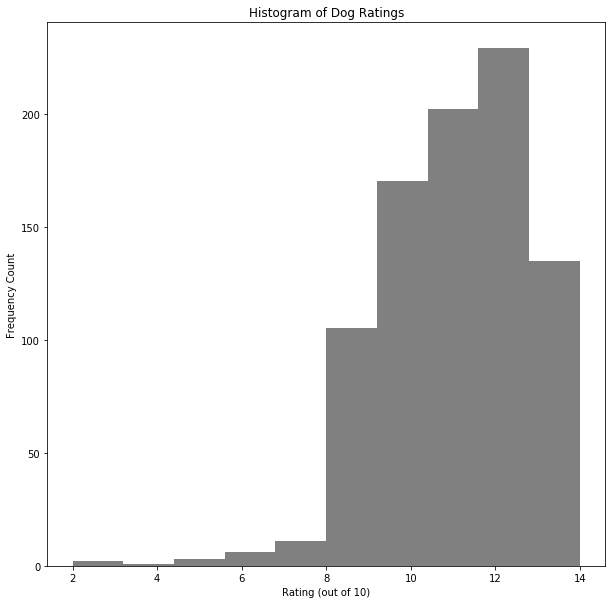

In [207]:
# visualization 1
v1 = df_clean.rating_numerator.plot.hist(color = 'grey', figsize = (10, 10))
v1.set_xlabel('Rating (out of 10)')
v1.set_ylabel('Frequency Count')
v1.set_title('Histogram of Dog Ratings')

**Visualization 1**

Graph the frequency of each dog rating.

> Based on the histogram above, the most frequent dog rating is 12. Additionally, dogs are frequently rated over 10, as they should be.